### Table of Contents

* [Euler explicit](#chapter1)
* [Euler implicit](#chapter2)
* [Runge Kutta à l'ordre 4](#chapter3)

# Lorenz ODE numerical Methods
by AYDOGDU Melissa and LECOURTIER Frédérique

***Lorenz ODE:***
$$\left\{\begin{align} 
    x'&=\sigma(y-x) \\
    y'&=x(r-z)-y \\
    z'&=xy-bz
\end{align}\right.$$

Utils fonctions :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_lorenz(fig,num,fct,γ,X0,N,T):
    ax = fig.add_subplot(1,2,num, projection='3d')

    x,y,z=fct(γ,X0,N,T)
    
    ax.plot(x,y,z)
    ax.plot(X0[0],X0[1],X0[2],"r.")
    
    ax.set_title(str(fct.__name__)+"\n"+fr"$\sigma={γ[0]}, b={γ[1]}, r={γ[2]},$" + "\n" + fr"$X0=({X0[0]}, {X0[1]}, {X0[2]}), N={N}, T={T}$")
    ax.set_xlabel("x")
    ax.set_zlabel("z")
    ax.view_init(28,-95)

## Euler explicit <a class="anchor" id="chapter1"></a>

* simple
* conditionnelement stable (n'augmente pas les erreurs d'approximations seulement si $\Delta t$ est assez petit)
* $O(\Delta t)$ global erreur

We will use the finite difference method. 

We start by slicing the interval $[0,T]$ in $N+1$ discretization points (so $N$ intervals). 

So $\Delta t=\frac{T}{N}$. for $n=\{0,\dots,N\}$, we will have:

$$\left\{\begin{align} 
    x_n&=n\Delta t \\
    y_n&=n\Delta t \\
    z_n&=n\Delta t
\end{align}\right.$$

By Taylor's theorem, we get :

$$\begin{align}
&&x(t+\Delta t)&=x(t)+\Delta t x'(t) + O(\Delta t^2) \\
\Rightarrow&& \quad x'(t)&=\frac{x(t+\Delta t)-x(t)}{\Delta t} + O(\Delta t) \\
\Rightarrow&& \quad \partial_t x_n&\approx\frac{x_{n+1}-x_n}{\Delta t} \\
\end{align}
$$

In the same way, 

$$\partial_t y_n\approx\frac{y_{n+1}-y_n}{\Delta t} \quad et \quad \partial_t z_n\approx\frac{z_{n+1}-z_n}{\Delta t}$$

After having set the initial conditions $(x_0,y_0,z_0)$, we have for $n=0 ,\dots,N-1$ :
 
$$\left\{\begin{align} 
    \frac{x_{n+1}-x_n}{\Delta t}&=\sigma(y_n-x_n) \\
    \frac{y_{n+1}-y_n}{\Delta t}&=x_n(r-z_n)-y_n \\
    \frac{z_{n+1}-z_n}{\Delta t}&=x_ny_n-bz_n
\end{align}\right.$$

and therefore

$$\left\{\begin{align} 
    x_{n+1}&=\sigma\Delta t y_n+(1-\sigma\Delta t) x_n \\
    y_{n+1}&=\Delta t x_n(r-z_n)(1-\Delta t)y_n \\
    z_{n+1}&=\Delta t x_ny_n+(1-b\Delta t)z_n
\end{align}\right.$$

### Résolution numérique

In [3]:
def euler_explicit(γ,X0,N,T): #on a N+1 points de discrétisation
    (σ,b,r)=γ
    (x0,y0,z0)=X0
    dt=T/N
    x=[x0]
    y=[y0]
    z=[z0]
    for n in range(1,N+1):
        x.append(σ*dt*y[n-1]+(1-σ*dt)*x[n-1])
        y.append(dt*x[n-1]*(r-z[n-1])+(1-dt)*y[n-1])
        z.append(dt*x[n-1]*y[n-1]+(1-dt*b)*z[n-1])
    return x,y,z

#### Globally stable : $0<r<1$

In [4]:
γ=(10.,8./3,9./10) #(σ,b,r)
X0=(-10.,10.,5.) #(x0,y0,z0)
X0_2=(2.,3.,-4.)
N=5000
T=100

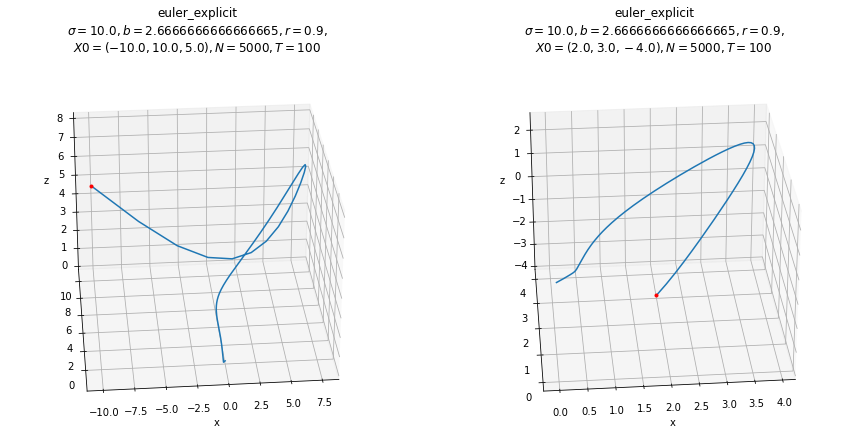

In [5]:
fig = plt.figure(figsize=(15,10))
plot_lorenz(fig,1,euler_explicit,γ,X0,N,T)
plot_lorenz(fig,2,euler_explicit,γ,X0_2,N,T)

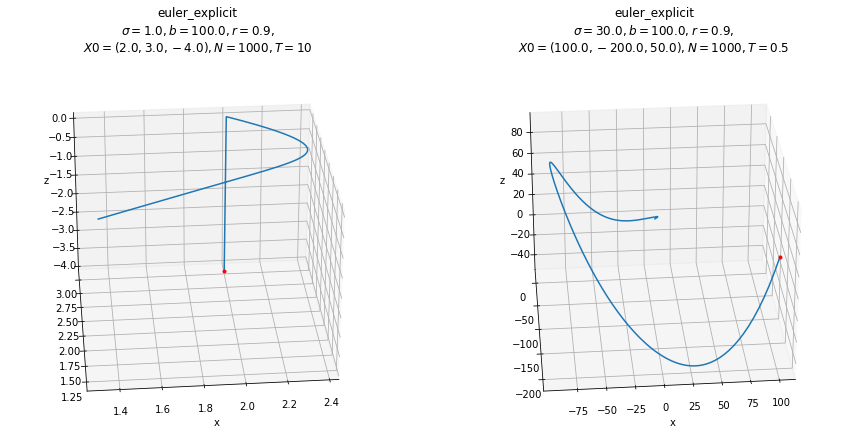

In [6]:
fig = plt.figure(figsize=(15,10))

γ_1=(1.,100.,9./10) #(σ,b,r)
X0_1=(2.,3.,-4.) #(x0,y0,z0)
plot_lorenz(fig,1,euler_explicit,γ_1,X0_1,1000,10)

γ_2=(30.,100.,9./10)
X0_2=(100.,-200.,50.)
plot_lorenz(fig,2,euler_explicit,γ_2,X0_2,1000,0.5)

Avec $\Delta t/2$ :

In [7]:
γ=(10.,8./3,9./10) #(σ,b,r)
X0=(-10.,10.,5.) #(x0,y0,z0)
X0_2=(2.,3.,-4.)
N=5000
T=100

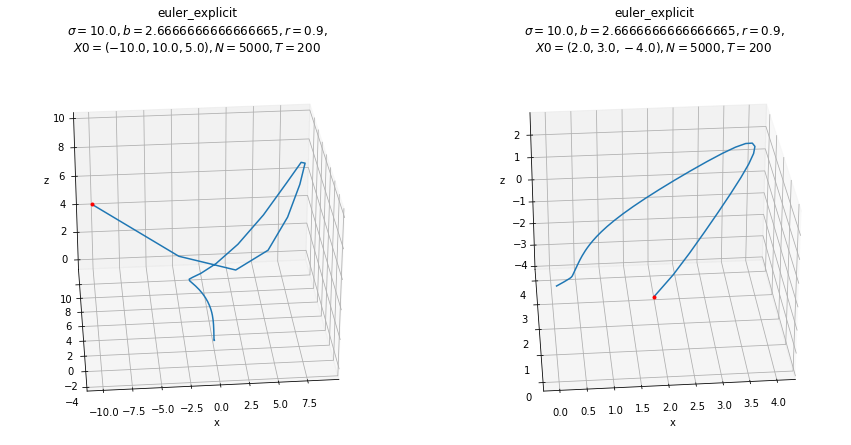

In [8]:
fig = plt.figure(figsize=(15,10))
plot_lorenz(fig,1,euler_explicit,γ,X0,N,2*T)
plot_lorenz(fig,2,euler_explicit,γ,X0_2,N,2*T)

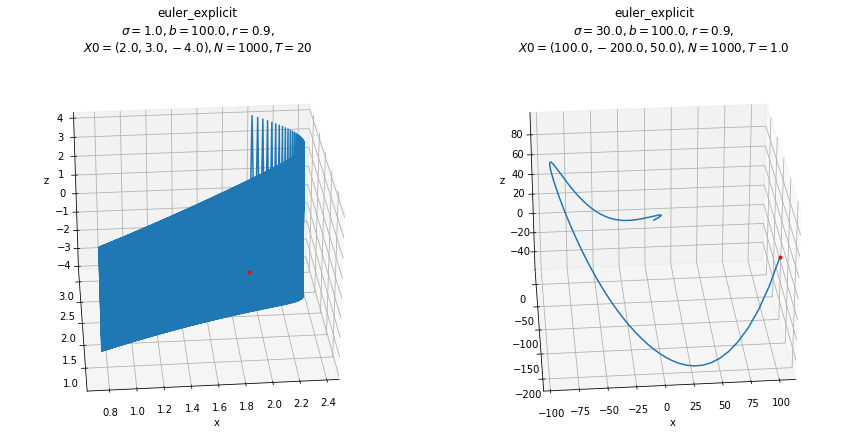

In [9]:
fig = plt.figure(figsize=(15,10))

γ_1=(1.,100.,9./10) #(σ,b,r)
X0_1=(2.,3.,-4.) #(x0,y0,z0)
plot_lorenz(fig,1,euler_explicit,γ_1,X0_1,1000,2*10)

γ_2=(30.,100.,9./10)
X0_2=(100.,-200.,50.)
plot_lorenz(fig,2,euler_explicit,γ_2,X0_2,1000,2*0.5)

## Euler implicit <a class="anchor" id="chapter2"></a>

* stable
* $O(\Delta t)$ (moins que RK4)

Soit $f : [0; T] \times \mathbb{R}^n \rightarrow \mathbb{R}^n$ une fonction continue.

Pour $X_0\in \mathbb{R}^n$, le problème est de trouver $X\in C^1([0,T],\mathbb{R}^n)$ solution de l’équation différentielle :

$$\left\{\begin{aligned}
    X'&=f(t,X) \\
    X(0)&=X_0
\end{aligned}\right.$$

Pour résoudre le problème de Lorenz on va poser :

$$X'=\begin{pmatrix}
    x' \\
    y' \\
    z'
\end{pmatrix}, \quad X=\begin{pmatrix}
    x \\
    y \\
    z
\end{pmatrix} \quad et \quad f(t,X)=\begin{pmatrix}
    \sigma(y-x) \\
    x(r-z)-y \\
    xy-bz
\end{pmatrix}$$

Alors la méthode d'Euler implicite s'écrit :

$$X_{n+1}=X_n+\Delta t f(t^{n+1},X^{n+1})$$

c'est-à-dire :

$$\left\{\begin{align} 
    x_{n+1}&=x_n+\Delta t\sigma(y_{n+1}-x_{n+1}) \\
    y_{n+1}&=y_n+\Delta t x_{n+1}(r-z_{n+1})-y_{n+1} \\
    z_{n+1}&=z_n+\Delta tx_{n+1}y_{n+1}-\Delta tbz_{n+1}
\end{align}\right.$$

* Dans un premier temps, on isole les termes en $n+1$ à gauche et les termes en $n$ à droite :

$$\left\{\begin{align} 
    (1+\Delta t\sigma)x_{n+1}-\Delta t\sigma y_{n+1}&=x_n \\
    -\Delta t(r-z_{n+1})x_{n+1}+(1+\Delta t)y_{n+1}&=y_n \\
    -\Delta ty_{n+1}x_{n+1}+(1+\Delta tb)z_{n+1}&=z_n
\end{align}\right.$$

* On peut alors linéariser les termes $ \quad x_{n+1}y_{n+1}\approx x_{n+1,k+1}y_{n+1,k} \quad $ et $\quad x_{n+1}z_{n+1}\approx x_{n+1,k+1}z_{n+1,k},\quad $on obtient alors :

$$\left\{\begin{align} 
    (1+\Delta t\sigma)x_{n+1,k+1}-\Delta t\sigma y_{n+1,k+1}&=x_n \\
    -\Delta t(r-z_{n+1,k})x_{n+1,k+1}+(1+\Delta t)y_{n+1,k+1}&=y_n \\
    -\Delta ty_{n+1,k}x_{n+1,k+1}+(1+\Delta tb)z_{n+1,k+1}&=z_n
\end{align}\right.$$

* On peut alors mettre sous forme matricielle $M(X_{n+1,k})X_{n+1,k+1}=X_n$ avec :

$$M(X_{n+1,k})=\begin{pmatrix}
    1+\Delta t\sigma & -\Delta t\sigma & 0 \\
    -\Delta t(r-z_{n+1,k}) & 1+\Delta t & 0 \\
    -\Delta ty_{n+1,k} & 0 & 1+\Delta tb
\end{pmatrix}, \quad X_{n+1,k+1}=\begin{pmatrix}
    x_{n+1,k+1} \\
    y_{n+1,k+1} \\
    z_{n+1,k+1}
\end{pmatrix} \quad et \quad X_n=\begin{pmatrix}
    x_n \\
    y_n \\
    z_n
\end{pmatrix} $$

### Résolution numérique

In [10]:
def euler_implicit(γ,X0,N,T): #on a N+1 points de discrétisation
    (σ,b,r)=γ
    (x0,y0,z0)=X0
    dt=T/N

    X = np.zeros( (N+1, len(X0)) )
    X[0] = X0
    
    t=0. #=t_0
    
    for n in range(1,N+1):
        X_kp = X[n-1] #X^{n+1,0}=X^n
        X_k = X_kp + np.ones((len(X0),1))
        k=0
        while np.linalg.norm(X_kp-X_k)/np.linalg.norm(X_k)>1e-5 and k<100:
            X_k = X_kp
            
            M1=np.array([1+dt*σ, -dt*σ, 0])
            M2=np.array([-dt*(r-X_k[2]), 1+dt, 0])
            M3=np.array([-dt*X_k[1], 0, 1+dt*b])
            M=np.stack([M1,M2,M3],axis=0)
            
            X_kp=np.linalg.solve(M,X[n-1])
            k+=1
        X[n]=X_kp
        
    return X[:,0],X[:,1],X[:,2]

In [11]:
γ=(10.,8./3,9./10) #(σ,b,r)
X0=(-10.,10.,5.) #(x0,y0,z0)
X0_2=(2.,3.,-4.)
N=5000
T=100

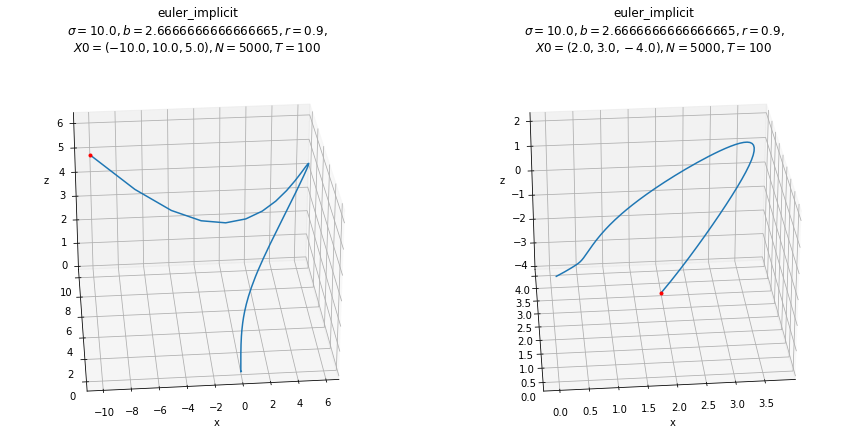

In [12]:
fig = plt.figure(figsize=(15,10))
plot_lorenz(fig,1,euler_implicit,γ,X0,N,T)
plot_lorenz(fig,2,euler_implicit,γ,X0_2,N,T)

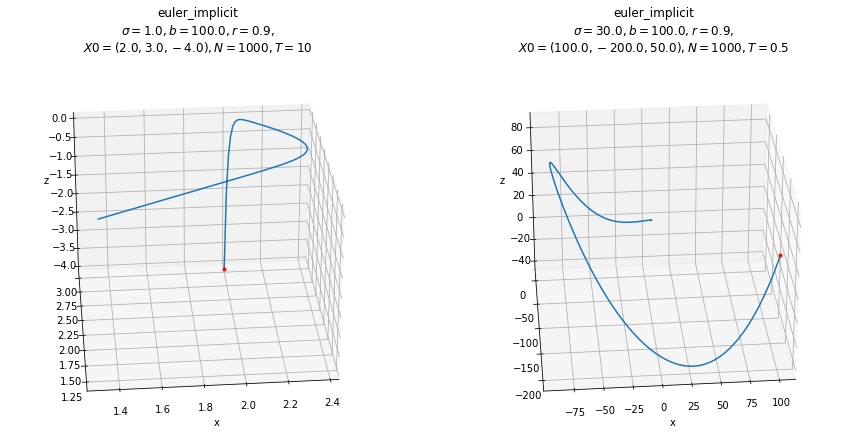

In [13]:
fig = plt.figure(figsize=(15,10))

γ_1=(1.,100.,9./10) #(σ,b,r)
X0_1=(2.,3.,-4.) #(x0,y0,z0)
plot_lorenz(fig,1,euler_implicit,γ_1,X0_1,1000,10)

γ_2=(30.,100.,9./10)
X0_2=(100.,-200.,50.)
plot_lorenz(fig,2,euler_implicit,γ_2,X0_2,1000,0.5)

## Runge Kutta à l'ordre 4 <a class="anchor" id="chapter3"></a>

* assez simple
* explicite
* $O(\Delta t^4)$ global error -> Beaucoup mieux que Euler explicite

Soit $f : [0; T] \times \mathbb{R}^n \rightarrow \mathbb{R}^n$ une fonction continue.

Pour $X_0\in \mathbb{R}^n$, le problème est de trouver $X\in C^1([0,T],\mathbb{R}^n)$ solution de l’équation différentielle :

$$\left\{\begin{aligned}
    X'&=f(t,X) \\
    X(0)&=X_0
\end{aligned}\right.$$

Pour résoudre le problème de Lorenz on va poser :

$$X'=\begin{pmatrix}
    x' \\
    y' \\
    z'
\end{pmatrix}, \quad X=\begin{pmatrix}
    x \\
    y \\
    z
\end{pmatrix} \quad et \quad f(t,X)=\begin{pmatrix}
    \sigma(y-x) \\
    x(r-z)-y \\
    xy-bz
\end{pmatrix}$$

Alors la méthode de Runge Kutta d'ordre 4 s'écrit :

$$X_{n+1}=X_n+\frac{\Delta t}{6}\left(K_1+2K_2+2K_3+K_4\right)$$

where 

$$\left\{\begin{aligned}
    K_1&=f(t^n,X^n) \\
    K_2&=f\left(t^n+\frac{\Delta t}{2},X^n+\frac{1}{2} K_1\Delta t\right) \\
    K_3&=f\left(t^n+\frac{\Delta t}{2},X^n+\frac{1}{2} K_2\Delta t\right) \\
    K_4&=f\left(t^n+\Delta t,X^n+K_3\Delta t\right)
\end{aligned}\right.$$

### Résolution numérique

In [14]:
def f(γ,t_n,X_n): #X_n=(x_n,y_n,z_n)
    (σ,b,r)=γ
    (x,y,z)=X_n
    
    f_1 = σ*(y-x)
    f_2 = x*(r-z)-y
    f_3 = x*y-b*z
    return np.array([f_1,f_2,f_3])

In [15]:
def RK4_Lorenz(γ,X0,N,T): #on a N+1 points de discrétisation
    (σ,b,r)=γ
    
    dt=T/N
    
    X = np.zeros( (N+1, len(X0)) )
    X[0] = X0
    
    t=0. #=t_0
    for n in range(1,N+1):
        K1=f(γ, t, X[n-1])
        K2=f(γ, t+dt/2., X[n-1] + 1./2. * K1 * dt)
        K3=f(γ, t+dt/2., X[n-1] + 1./2. * K2 * dt)
        K4=f(γ, t+dt, X[n-1]+ K3 * dt)
        
        X[n]=X[n-1]+ dt/6.* (K1+2.*K2+2.*K3+K4)
        t+=dt
        
    return X[:,0],X[:,1],X[:,2]

In [16]:
γ=(10.,8./3,9./10) #(σ,b,r)
X0=(-10.,10.,5.) #(x0,y0,z0)
X0_2=(2.,3.,-4.)
N=5000
T=100

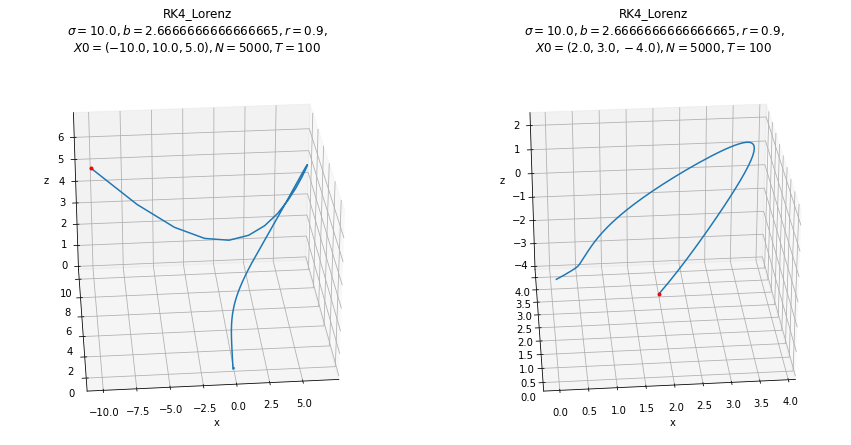

In [17]:
fig = plt.figure(figsize=(15,10))
plot_lorenz(fig,1,RK4_Lorenz,γ,X0,N,T)
plot_lorenz(fig,2,RK4_Lorenz,γ,X0_2,N,T)

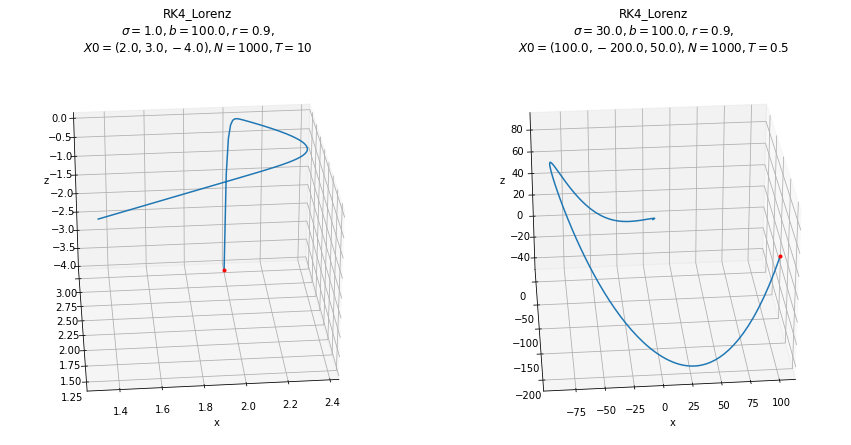

In [18]:
fig = plt.figure(figsize=(15,10))

γ_1=(1.,100.,9./10) #(σ,b,r)
X0_1=(2.,3.,-4.) #(x0,y0,z0)
plot_lorenz(fig,1,RK4_Lorenz,γ_1,X0_1,1000,10)

γ_2=(30.,100.,9./10)
X0_2=(100.,-200.,50.)
plot_lorenz(fig,2,RK4_Lorenz,γ_2,X0_2,1000,0.5)